In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from glob import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
csv_files = glob("zippedData/*.csv.gz")

In [3]:
csv_files

['zippedData/imdb.title.crew.csv.gz',
 'zippedData/tmdb.movies.csv.gz',
 'zippedData/imdb.title.akas.csv.gz',
 'zippedData/imdb.title.ratings.csv.gz',
 'zippedData/imdb.name.basics.csv.gz',
 'zippedData/imdb.title.basics.csv.gz',
 'zippedData/tn.movie_budgets.csv.gz',
 'zippedData/bom.movie_gross.csv.gz',
 'zippedData/imdb.title.principals.csv.gz']

In [4]:
csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".", "_")
    filename_df = pd.read_csv(filename, index_col = 0)
    csv_files_dict[filename_cleaned] = filename_df

In [5]:
csv_files_dict.keys()

dict_keys(['imdb_title_crew_gz', 'tmdb_movies_gz', 'imdb_title_akas_gz', 'imdb_title_ratings_gz', 'imdb_name_basics_gz', 'imdb_title_basics_gz', 'tn_movie_budgets_gz', 'bom_movie_gross_gz', 'imdb_title_principals_gz'])

In [6]:
csv_files_dict['imdb_title_ratings_gz']

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21
...,...,...
tt9805820,8.1,25
tt9844256,7.5,24
tt9851050,4.7,14


In [7]:
csv_files_dict['tmdb_movies_gz']

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [8]:
csv_files_dict['imdb_title_basics_gz'].head()

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [9]:
movie_gross = csv_files_dict['bom_movie_gross_gz']

In [10]:
movie_budgets = csv_files_dict['tn_movie_budgets_gz']


In [11]:
movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [12]:
def convert_col_to_int(df, col):
    df[col] = df[col].str.replace("$", "").str.replace(",", "").astype('int')
    return df

In [13]:
col_to_convert = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in col_to_convert:
    movie_budgets = convert_col_to_int(movie_budgets, col)

In [14]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
dtypes: int64(3), object(2)
memory usage: 271.0+ KB


In [15]:
movie_budgets['profit'] = movie_budgets['worldwide_gross'] - movie_budgets['production_budget']
movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
id,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [16]:
movie_gross.head()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


In [17]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


In [18]:
movie_gross.isna().sum()

studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [19]:
movie_gross.isna().sum() / len(movie_gross)

studio            0.001476
domestic_gross    0.008267
foreign_gross     0.398583
year              0.000000
dtype: float64

In [20]:
movie_gross = movie_gross.drop(columns = ['foreign_gross'])

In [21]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 3 columns):
studio            3382 non-null object
domestic_gross    3359 non-null float64
year              3387 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.8+ KB


In [22]:
movie_gross.isna().sum()

studio             5
domestic_gross    28
year               0
dtype: int64

In [23]:
cleaned_gross = movie_gross.dropna(subset = ['domestic_gross'])

In [24]:
cleaned_gross.isna().sum()

studio            3
domestic_gross    0
year              0
dtype: int64

In [25]:
cleaned_gross.isna().sum()

studio            3
domestic_gross    0
year              0
dtype: int64

In [26]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 6 columns):
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
profit               5782 non-null int64
dtypes: int64(4), object(2)
memory usage: 316.2+ KB


In [27]:
cleaned_gross.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3359 entries, Toy Story 3 to An Actor Prepares
Data columns (total 3 columns):
studio            3356 non-null object
domestic_gross    3359 non-null float64
year              3359 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.0+ KB


In [28]:
result = pd.merge(cleaned_gross, movie_budgets)

In [29]:
result

,studio,domestic_gross,year,release_date,movie,production_budget,worldwide_gross,profit
0,Fox,81600000.0,2010,"Jan 1, 1970",M*A*S*H,3500000,81600000,78100000
1,SGem,80000000.0,2010,"Feb 17, 1984",Footloose,8200000,80000000,71800000
2,P/DW,73000000.0,2010,"Nov 18, 1959",Ben-Hur,15000000,73259017,58259017
3,Par.,73000000.0,2011,"Nov 18, 1959",Ben-Hur,15000000,73259017,58259017
4,W/Dim.,25000000.0,2010,"Jan 1, 1976",Logan's Run,7000000,25000000,18000000
...,...,...,...,...,...,...,...,...
807,Sony,12000000.0,2017,"Feb 23, 1966",Harper,3500000,12000000,8500000
808,BH Tilt,12000000.0,2018,"Jun 24, 1977",Sorcerer,21600000,12005968,-9594032
809,BH Tilt,12000000.0,2018,"Feb 23, 1966",Harper,3500000,12000000,8500000
810,Global Road,9600000.0,2018,"Jul 28, 1954",On the Waterfront,910000,9600000,8690000


In [30]:
len(result['studio'])

812

In [31]:
len(result['studio'])-len(result['studio'].drop_duplicates())

720

In [32]:
clean_result = result.drop_duplicates(subset = ['studio'])

In [33]:
len(clean_result['studio'])

92

In [34]:
clean_result = clean_result.drop_duplicates(subset = ['movie'])

In [35]:
clean_result.head()

,studio,domestic_gross,year,release_date,movie,production_budget,worldwide_gross,profit
0,Fox,81600000.0,2010,"Jan 1, 1970",M*A*S*H,3500000,81600000,78100000
1,SGem,80000000.0,2010,"Feb 17, 1984",Footloose,8200000,80000000,71800000
2,P/DW,73000000.0,2010,"Nov 18, 1959",Ben-Hur,15000000,73259017,58259017
4,W/Dim.,25000000.0,2010,"Jan 1, 1976",Logan's Run,7000000,25000000,18000000
10,MBox,7600000.0,2010,"Sep 25, 1961",The Hustler,2000000,7600000,5600000


In [36]:
clean_result.sort_values(by = ['profit'], ascending = False, inplace = True)

In [43]:
clean_result = clean_result.reset_index().head()

In [47]:
clean_result.head(10)

,index,studio,domestic_gross,year,release_date,movie,production_budget,worldwide_gross,profit
0,0,Fox,81600000.0,2010,"Jan 1, 1970",M*A*S*H,3500000,81600000,78100000
1,1,SGem,80000000.0,2010,"Feb 17, 1984",Footloose,8200000,80000000,71800000
2,2,P/DW,73000000.0,2010,"Nov 18, 1959",Ben-Hur,15000000,73259017,58259017
3,15,Over.,39100000.0,2010,"Oct 4, 1962",The Longest Day,10000000,50100000,40100000
4,417,Neon,30000000.0,2017,"Jun 12, 1981",Clash of the Titans,15000000,44400000,29400000


Text(0.5, 1.0, 'Production budget (light blue) and Profit for top movie studios')

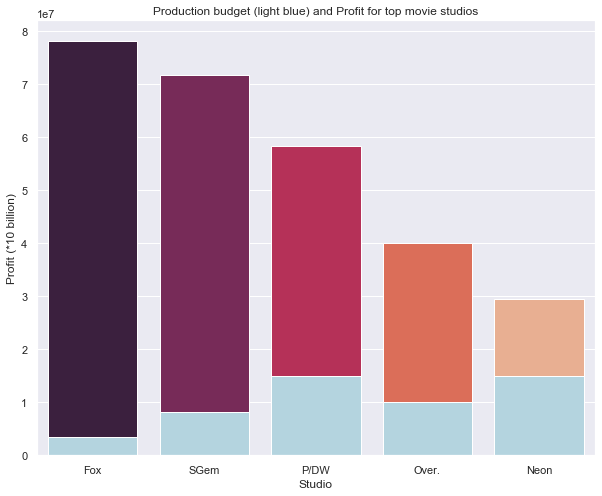

In [54]:
print()
plt.figure(figsize= (10,8))
sns.set_context('notebook')
sns.set_style('darkgrid')
sns.barplot(x = 'studio', y = 'profit', data = clean_result.head(10), palette = 'rocket')
sns.barplot(x = 'studio', y = 'production_budget', data = clean_result.head(10), color = 'lightblue')
plt.xlabel('Studio')
plt.ylabel("Profit (*10 billion)")
plt.title("Production budget (light blue) and Profit for top movie studios")